<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Mod_2_Lab_4_t_Distributed_Stochastic_Neighbor_Embedding_(t_SNE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 2: Appreciating, Interpreting and Visualizing Data

### Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

Many of you already heard about dimensionality reduction algorithms like PCA. One of those algorithms is called t-SNE (t-distributed Stochastic Neighbor Embedding). It was developed by Laurens van der Maaten and Geoffrey Hinton in 2008.t-SNE is something called nonlinear dimensionality reduction.

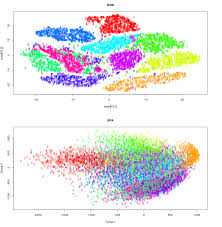

### HOW DOES T-SNE WORK?
1. The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

2. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

3. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

4. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

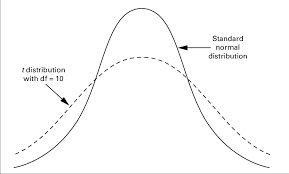

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [ ]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

Print the images from dataset

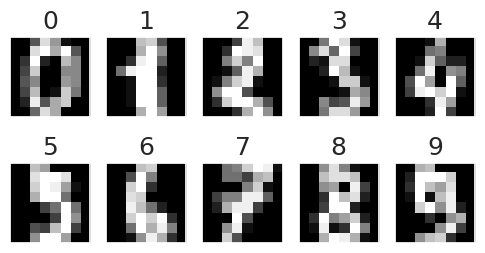

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [ ]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])


## TSNE to fit the dataset with the default values.
1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

### Data visualizing in the projected space

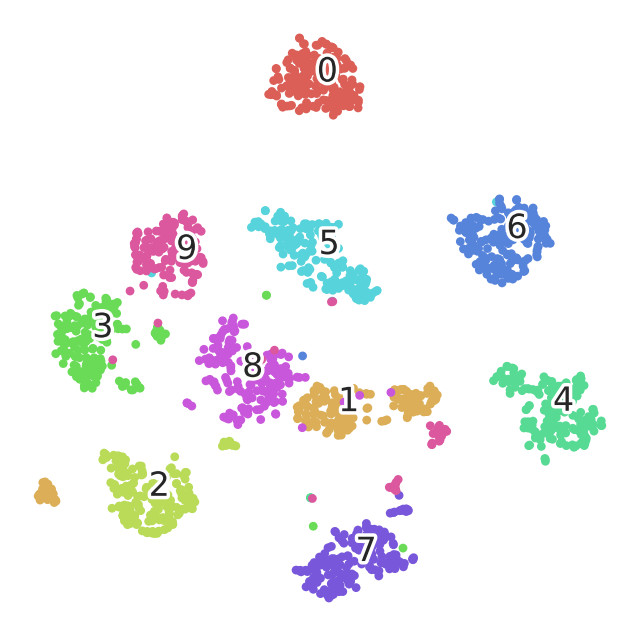

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfed8ea7d0>)

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

 In the above visualization each number form a cluster

### Tweaking some of the hyperparameters to better understand their role


---
Changing the **Perlexity** value


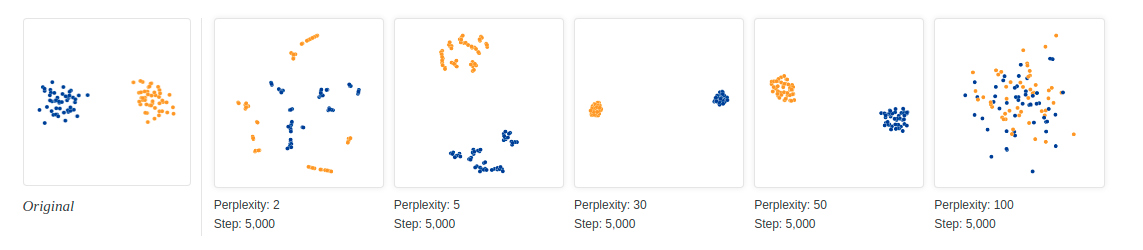

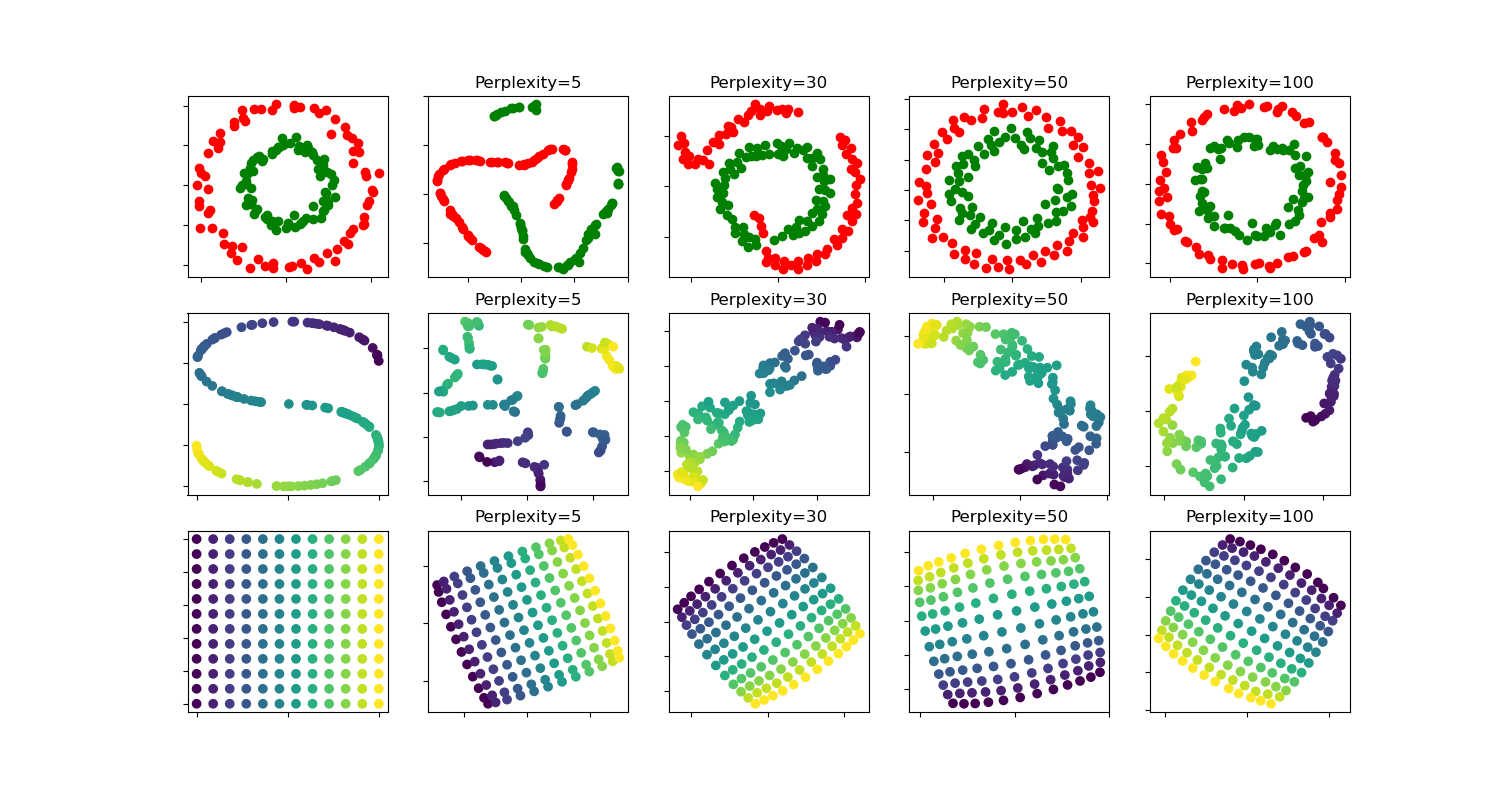

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.

* n_components : 2
* perplexity : **5**
* n_iter : 1000
* method : ‘barnes_hut’

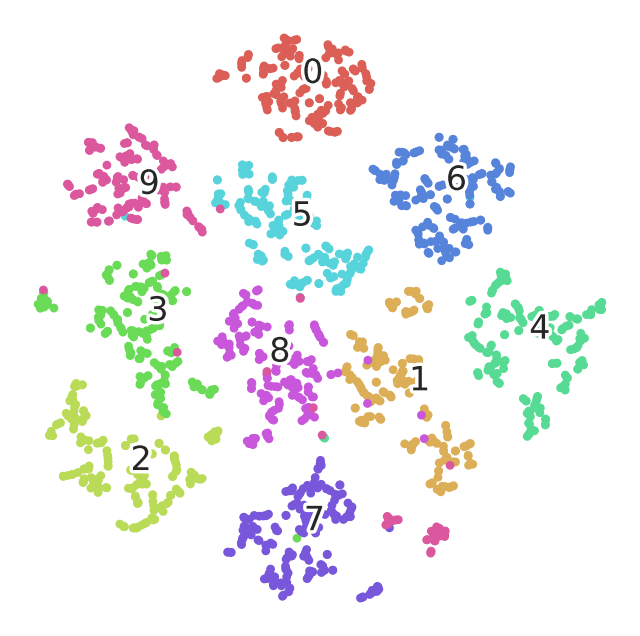

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfe8553c70>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.

* n_components : 2
* perplexity : **100**
* n_iter : 1000
* method : ‘barnes_hut’

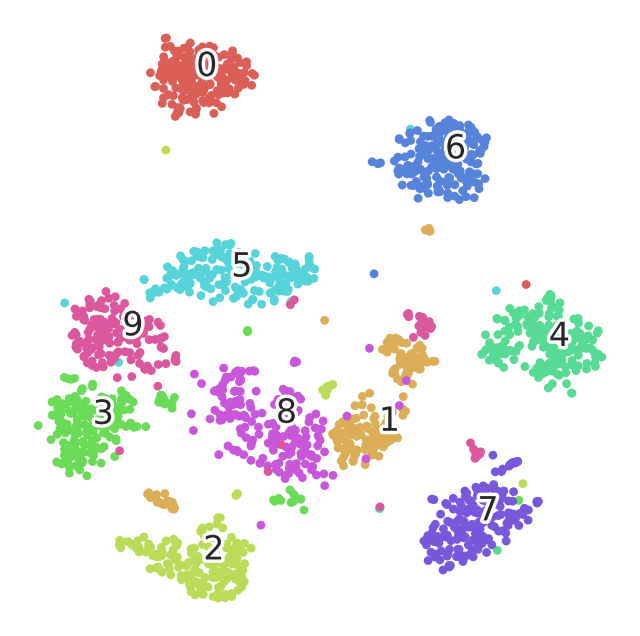

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfe85e85e0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---


### Changing the NUMBER OF ITERATIONS

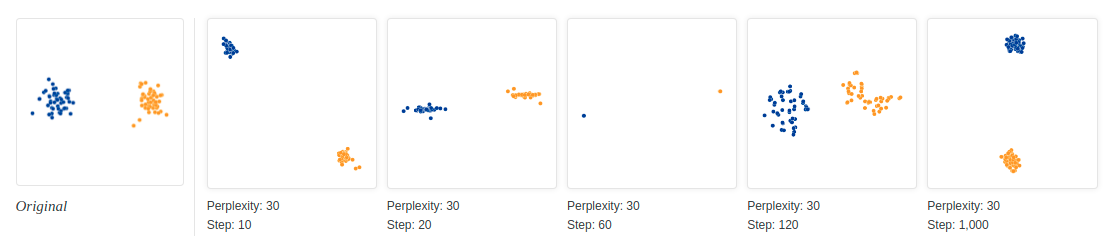

The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.



---


* n_components : 2
* perplexity : 30
* n_iter : **250**
* method : ‘barnes_hut’

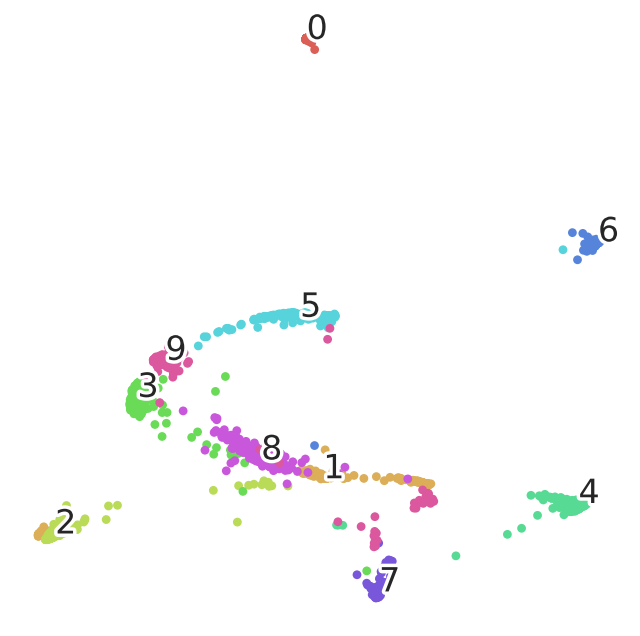

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bd026f69840>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

Suboptimal clustering of the groups are observed


* n_components : 2
* perplexity : 30
* n_iter : **5000**
* method : ‘barnes_hut’

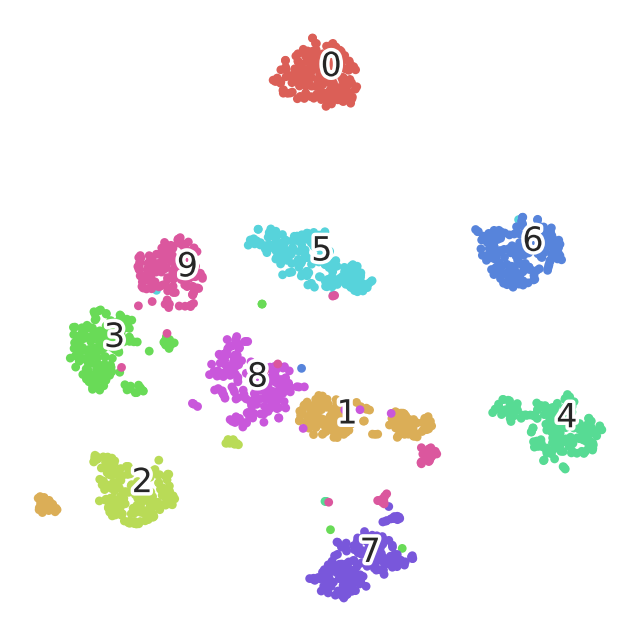

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfe8fda680>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---
### Changing the method to EXACT
The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.
* n_components : 2
* perplexity : 30
* n_iter : 1000
* method : ‘exact’

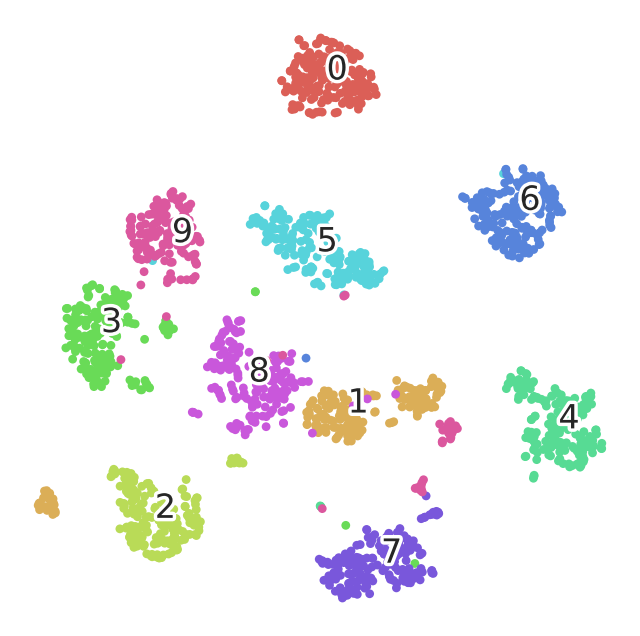

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfe865a200>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

### **EXERCISE**

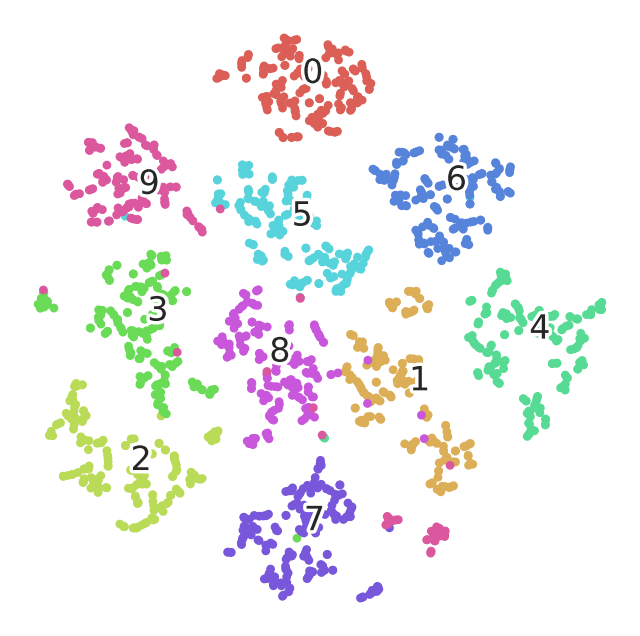

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfe8fb74c0>)

In [ ]:
perplexity_value = 5 # Preplexity =5
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

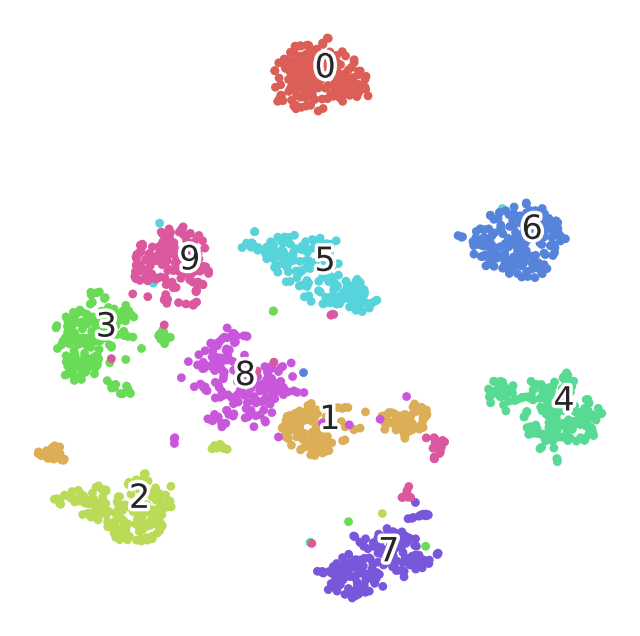

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfe8271ff0>)

In [ ]:
perplexity_value = 50  #Perplexity=50
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

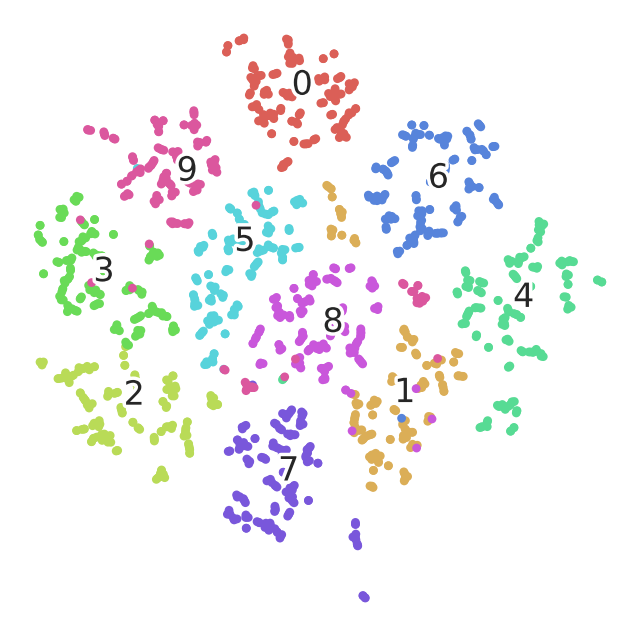

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7bcfe82f3010>)

In [ ]:
perplexity_value = 2
number_iterations = 10000  #Varitation in iteration number
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

Point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?

Pointers:
1. Which of the two algorithms is linear and which one is non-linear?
2. How does the non-linearity in one of these two algorithms help in capturing certain data sets?
3. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?
4. Can you comment on which one of the two is computationally more expensive?

## Point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?
PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) are both techniques used for dimensionality reduction, but they have distinct differences:

### 1. Which of the two algorithms is linear and which one is non-linear?
PCA is a linear dimensionality reduction technique and t-SNE is non-linear

### 2. How does the non-linearity in one of these two algorithms help in capturing certain data sets?
t-SNE is particularly effective at capturing the local structure of the data. This means it can better preserve clusters of data points that are close to each other in the high-dimensional space.
PCA, being linear, may struggle with capturing complex non-linear relationships in the data.

### 3. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?

PCA tries to preserve the distances between points. This means that points that were far apart in the original high-dimensional space will remain relatively far apart in the lower-dimensional space.
t-SNE does not have this property. It tries to preserve the local neighborhood structure. In other words, it aims to keep similar points close to each other, even if that means sacrificing the distances between dissimilar points.

### 4. Can you comment on which one of the two is computationally more expensive?
PCA is computationally less expensive compared to t-SNE. PCA involves computing eigenvectors of the data's covariance matrix, which can be efficiently done using techniques like the power iteration method.
t-SNE involves the computation of probabilities and has a time complexity of O(n^2) or higher, where 'n' is the number of data points. This makes it slower, especially for large datasets.


## **PCA:(Principal Component Analysis)**
### *Advantages:*

Computationally efficient, making it suitable for large datasets.
Useful for linearly separable data and capturing global structure.
Well-understood and widely used.

### *Disadvantages:*

May not capture complex non-linear relationships in the data.


## **t-SNE:(t-Distributed Stochastic Neighbor Embedding)**
### *Advantages:*

Excellent at visualizing and preserving local clusters in the data.
Effective for exploratory data analysis and understanding the relationships between data points.

### *Disadvantages:*

1. Computationally expensive, making it less suitable for large datasets.
2. Doesn't preserve global distances, so it may not be suitable for all types of data.